In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

Text(0.5, 1.0, 'Uniform Distribution')

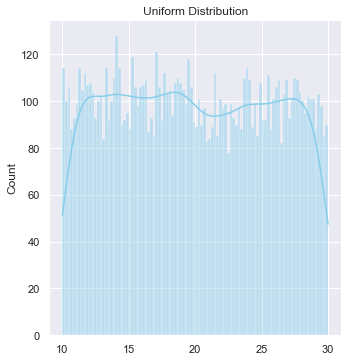

In [ ]:
from scipy.stats import uniform


data_uniform = uniform.rvs(size=10000, loc=10, scale=20)


sns.displot(data_uniform, bins=100, kde=True, color='skyblue')
plt.title("Uniform Distribution")

[171.50093765 170.12567327 170.135874   ... 171.16157962 169.34209437
 169.96209421]


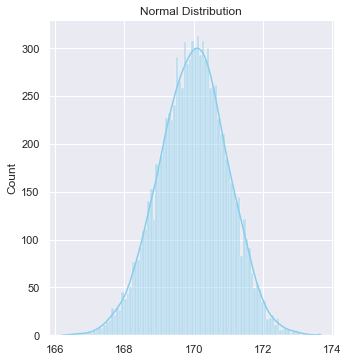

In [ ]:
from scipy.stats import norm


data_normal = norm.rvs(size=10000, loc=170, scale=1)

sns.displot(data_normal, bins=100, kde=True, color='skyblue')
plt.title("Normal Distribution")

print(data_normal)

In [ ]:
df = pd.read_csv('uler/heart.csv')
print(df.shape)
df.head()

(303, 15)


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df = pd.read_csv('data pandas/heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['gender'] = df['sex'].replace({1:'Pria', 0:'Wanita'})
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Pria
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Pria
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Wanita
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Pria
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Wanita


In [ ]:
df_heart = df[['gender', 'output']]
df_heart

,gender,output
0,Pria,1
1,Pria,1
2,Wanita,1
3,Pria,1
4,Wanita,1
...,...,...
298,Wanita,0
299,Pria,0
300,Pria,0
301,Pria,0


In [ ]:
pd.crosstab(df_heart['output'], df_heart['gender'])

gender,Pria,Wanita
output,,
0,114,24
1,93,72


In [ ]:

proporsi = 226 / (86 + 226)


jumlah_observasi = 86 + 226
SE = np.sqrt(proporsi * (1-proporsi) / jumlah_observasi)
z = 1.96
error = z * SE


CI_low = proporsi - error
CI_high = proporsi + error

print((CI_low, CI_high))

(0.6747765651256307, 0.773941383592318)


In [ ]:
df_chol = df[['gender','chol']]
df_chol

,gender,chol
0,Pria,233
1,Pria,250
2,Wanita,204
3,Pria,236
4,Wanita,354
...,...,...
298,Wanita,241
299,Pria,264
300,Pria,193
301,Pria,131


In [ ]:
df_chol.groupby('gender').agg({'chol':[np.mean, np.std, np.size]})

chol                
              mean        std size
gender                            
Pria    239.289855  42.782392  207
Wanita  261.302083  65.088946   96

In [ ]:
mean_pria = 239.237027


z = 1.96
sd_pria = 43.155535
n_pria = 713

SE = sd_pria / np.sqrt(n_pria)
error = z * SE

CI_low = mean_pria - error
CI_high = mean_pria + error

print((CI_low, CI_high))

(236.0692995254539, 242.4047544745461)


In [ ]:
mean_wanita = 261.455128


z = 1.96
sd_wanita = 64.466781
n_wanita = 312

SE = sd_wanita / np.sqrt(n_wanita)
error = z * SE

CI_low = mean_wanita - error
CI_high = mean_wanita + error

print((CI_low, CI_high))

(254.30169095203016, 268.6085650479699)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
 14  gender    303 non-null    object 
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Serangan Jantung 

In [ ]:
serangan_jantung=df.loc[df.output==1]
n_serangan_jantung=df.loc[df.output==0]

In [ ]:
len(serangan_jantung), len(n_serangan_jantung)

(165, 138)

In [ ]:
serangan_jantung.sex.value_counts(normalize=True)

1    0.563636
0    0.436364
Name: sex, dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

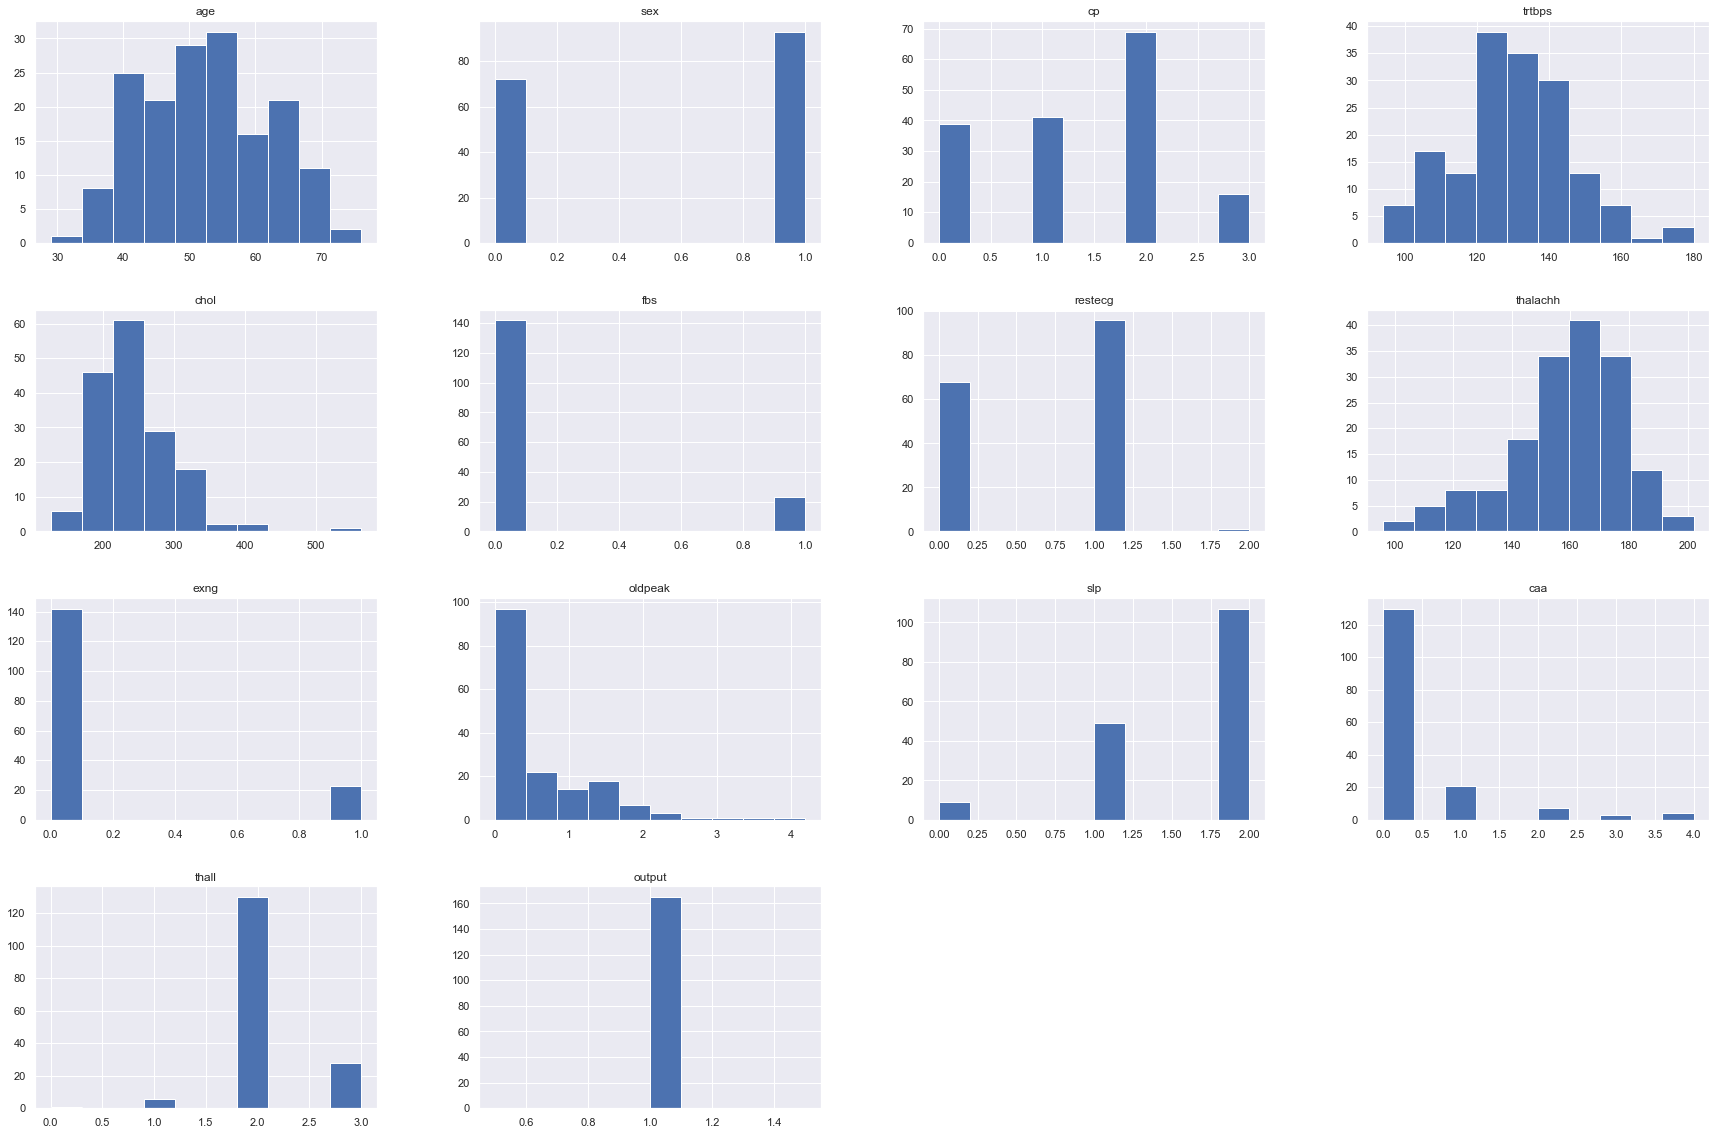

In [ ]:
serangan_jantung.hist(figsize=(30,20))

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'gender'],
      dtype='object')

<AxesSubplot:>

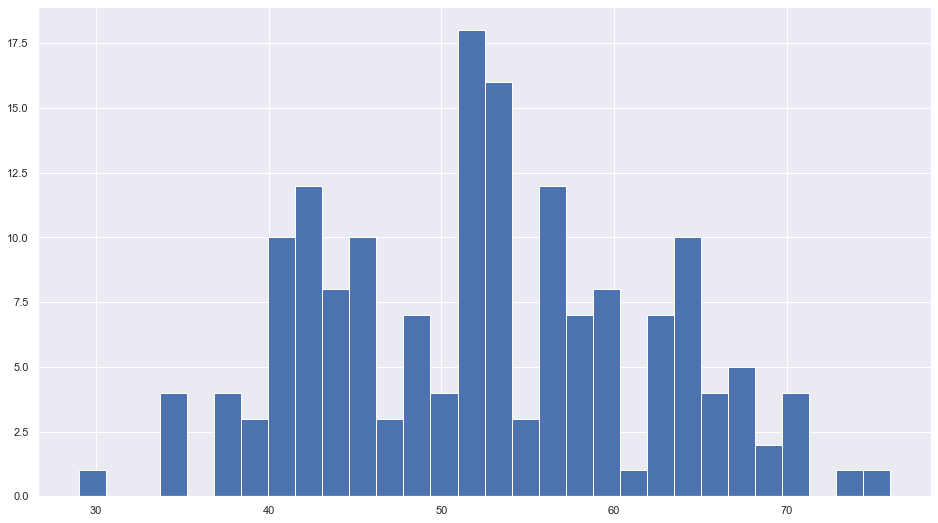

In [ ]:
serangan_jantung.age.hist(figsize=(16,9), bins=30)

In [ ]:
def age_category_values(df):
    m1=round(df.max()/5)*5
    m2=round(df.min()/5)*5
    L=[i for i in range(m2,m1,5)]
    dicts={}
    M=[]
    for a in range(len(L)):
        dicts[L[a]]=0
    for j in df:
        for k in L:
            if j<k:
                dicts[k]+=1
                break
    for b in dicts:
        M.append(([b-5,b],dicts[b]))
    return M

In [ ]:
age_category_values(serangan_jantung.age)

[([25, 30], 1),
 ([30, 35], 2),
 ([35, 40], 9),
 ([40, 45], 30),
 ([45, 50], 20),
 ([50, 55], 38),
 ([55, 60], 27),
 ([60, 65], 17),
 ([65, 70], 15)]

In [ ]:
s=0
for i in serangan_jantung.age:
    if 40<= i:
        s+=1
m=len(serangan_jantung)
print(100*s/m)

92.72727272727273


In [ ]:
serangan_jantung.cp.value_counts()

2    69
1    41
0    39
3    16
Name: cp, dtype: int64

<AxesSubplot:>

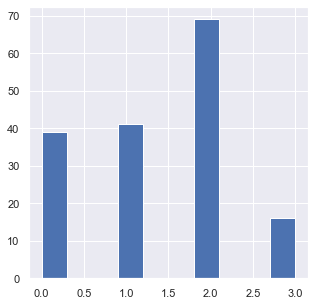

In [ ]:
serangan_jantung.cp.hist()

In [ ]:
serangan_jantung.cp.value_counts(normalize=True)

2    0.418182
1    0.248485
0    0.236364
3    0.096970
Name: cp, dtype: float64

<AxesSubplot:>

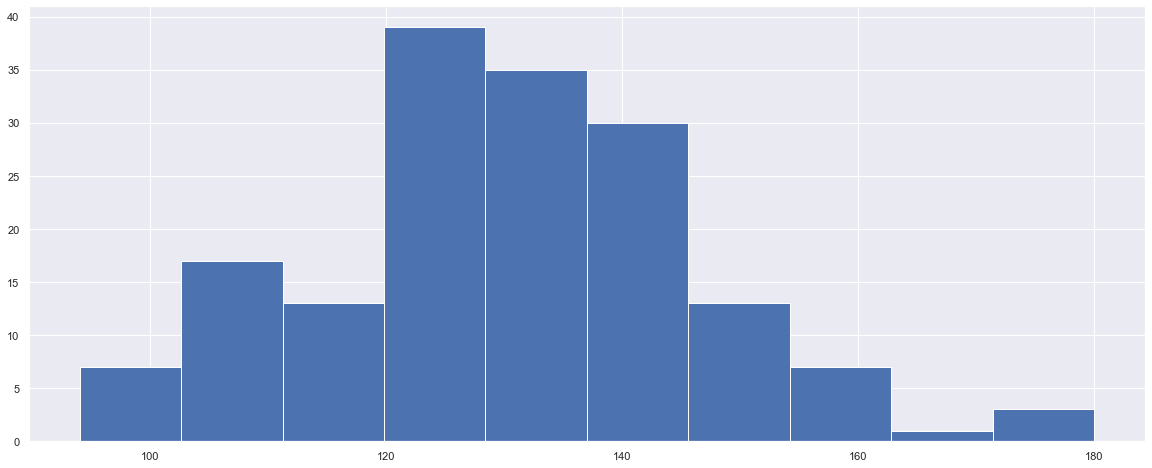

In [ ]:
serangan_jantung.trtbps.hist(figsize=(20,8))

In [ ]:
def category_values(df, step):
    m1=round(df.max()/step)*step
    m2=round(df.min()/step)*step
    L=[i for i in range(m2,m1+(2*step),step)]
    dicts={}
    M=[]
    for a in range(len(L)):
        dicts[L[a]]=0
    for j in df:
        for k in L:
            if j<k:
                dicts[k]+=1
                break
    for b in dicts:
        M.append(([b-step,b],dicts[b]))
    return M

In [ ]:
category_values(heart_attack.trtbps,10)

[([80, 90], 0),
 ([90, 100], 2),
 ([100, 110], 14),
 ([110, 120], 21),
 ([120, 130], 40),
 ([130, 140], 44),
 ([140, 150], 22),
 ([150, 160], 13),
 ([160, 170], 5),
 ([170, 180], 3),
 ([180, 190], 1)]

<AxesSubplot:xlabel='trtbps', ylabel='Count'>

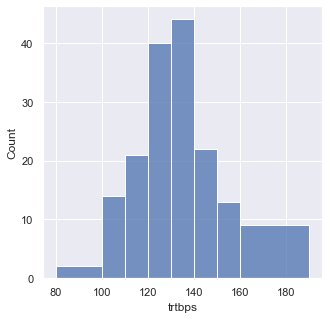

In [ ]:
sns.histplot(data=serangan_jantung,x="trtbps", bins=(80,100,110,120,130,140,150,160,190))

In [ ]:
a=0
for i in serangan_jantung.trtbps:
    if 110 <= i <=150:
        a+=1
print(100*(a/m))

82.42424242424242


<AxesSubplot:>

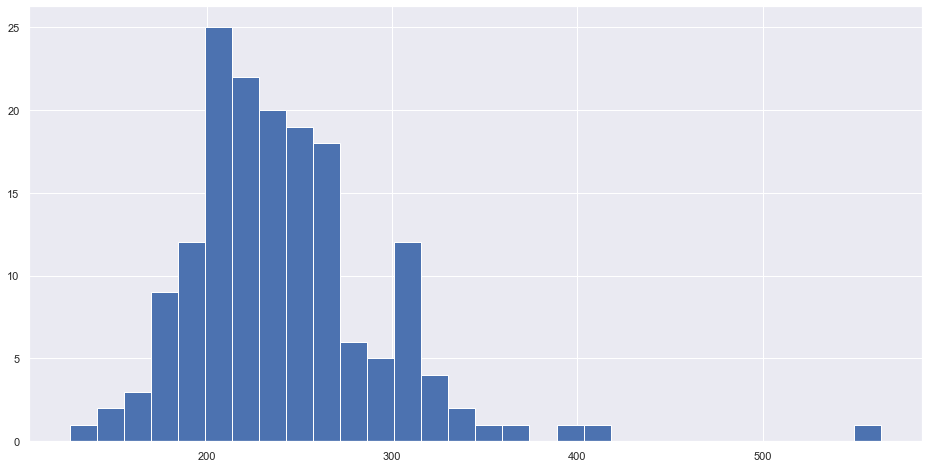

In [ ]:
serangan_jantung.chol.hist(figsize=(16,8), bins=30)

In [ ]:
category_values(serangan_jantung.chol,20)

[([100, 120], 0),
 ([120, 140], 1),
 ([140, 160], 3),
 ([160, 180], 8),
 ([180, 200], 18),
 ([200, 220], 28),
 ([220, 240], 31),
 ([240, 260], 25),
 ([260, 280], 22),
 ([280, 300], 6),
 ([300, 320], 13),
 ([320, 340], 3),
 ([340, 360], 3),
 ([360, 380], 1),
 ([380, 400], 1),
 ([400, 420], 1),
 ([420, 440], 0),
 ([440, 460], 0),
 ([460, 480], 0),
 ([480, 500], 0),
 ([500, 520], 0),
 ([520, 540], 0),
 ([540, 560], 0),
 ([560, 580], 1)]

In [ ]:
a=0
for i,j in category_values(serangan_jantung.chol,20):
    if i[0]>=180 and i[1]<=320:
        a+=j
print((a/len(heart_attack.chol))*100,"%")

86.66666666666667 %


<AxesSubplot:>

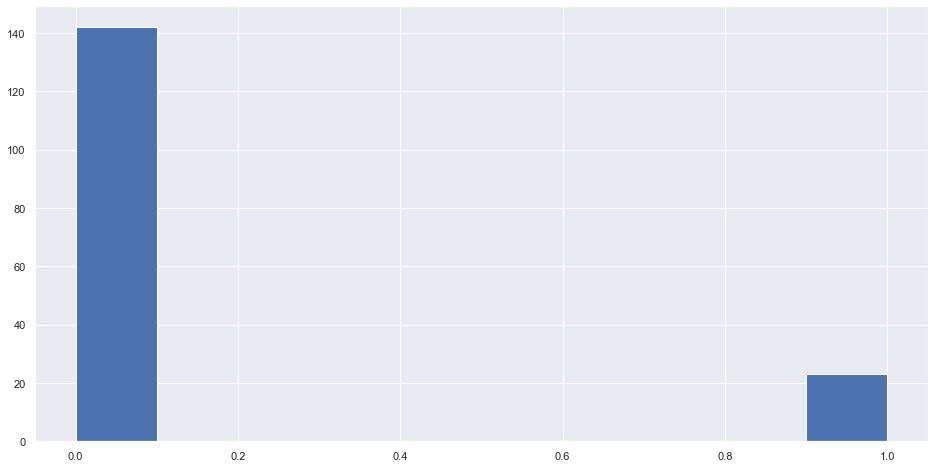

In [ ]:
serangan_jantung.fbs.hist(figsize=(16,8))

<AxesSubplot:xlabel='fbs', ylabel='Probability'>

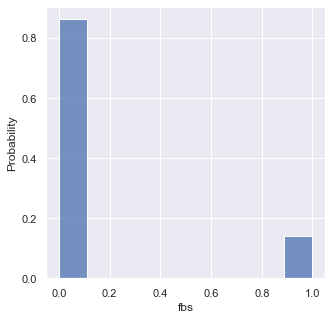

In [ ]:
sns.histplot(data=serangan_jantung, x="fbs", stat="probability")

<AxesSubplot:>

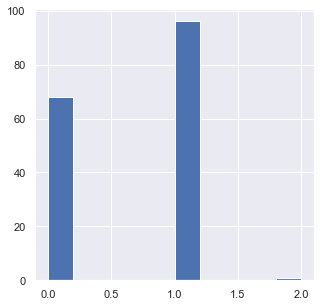

In [ ]:
serangan_jantung.restecg.hist()

In [ ]:
serangan_jantung.restecg.value_counts()

1    96
0    68
2     1
Name: restecg, dtype: int64

<AxesSubplot:xlabel='restecg', ylabel='Probability'>

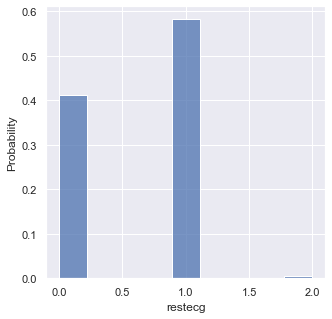

In [ ]:
sns.histplot(data=serangan_jantung, x="restecg", stat="probability")

<AxesSubplot:>

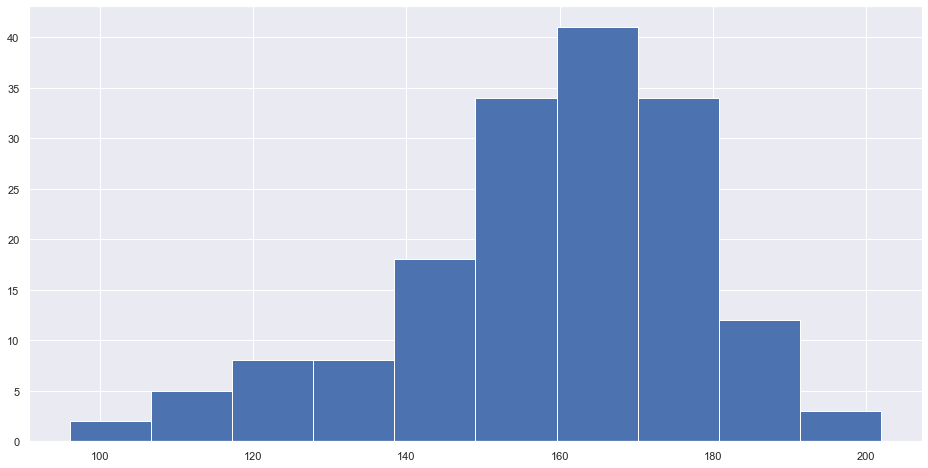

In [ ]:
serangan_jantung.thalachh.hist(figsize=(16,8))

In [ ]:
category_values(serangan_jantung.thalachh, 20)

[([80, 100], 1),
 ([100, 120], 6),
 ([120, 140], 17),
 ([140, 160], 51),
 ([160, 180], 73),
 ([180, 200], 16),
 ([200, 220], 1)]

In [ ]:
serangan_jantung.thalachh.max(), serangan_jantung.thalachh.min()

(202, 96)

In [ ]:
a=0
for i,j in category_values(serangan_jantung.thalachh,20):
    if i[0]>=120 and i[1]<=180:
        a+=j
print((a/len(serangan_jantung.thalachh))*100,"%")

85.45454545454545 %


<AxesSubplot:>

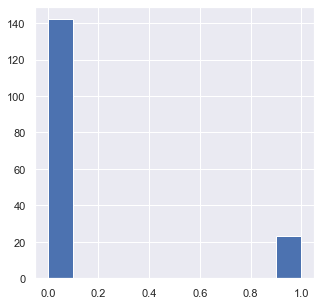

In [ ]:
serangan_jantung.exng.hist()

<AxesSubplot:xlabel='exng', ylabel='Probability'>

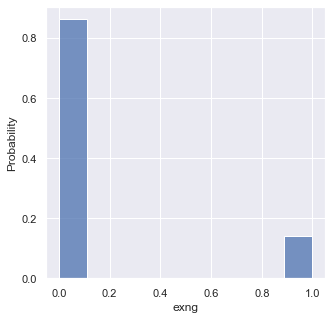

In [ ]:
sns.histplot(data=serangan_jantung, x="exng", stat="probability")

<AxesSubplot:>

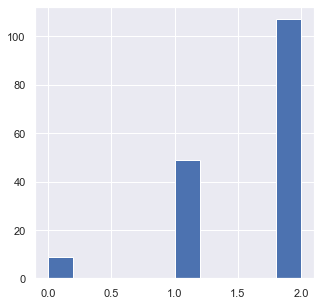

In [ ]:
serangan_jantung.slp.hist()

<AxesSubplot:xlabel='slp', ylabel='Probability'>

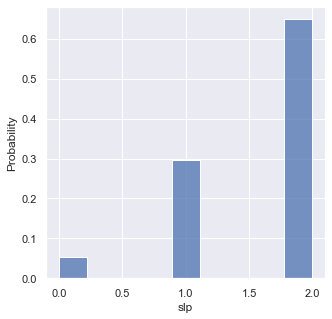

In [ ]:
sns.histplot(data=serangan_jantung, x="slp", stat="probability")

<AxesSubplot:>

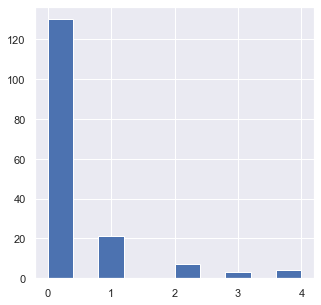

In [ ]:
serangan_jantung.caa.hist()

<AxesSubplot:xlabel='caa', ylabel='Probability'>

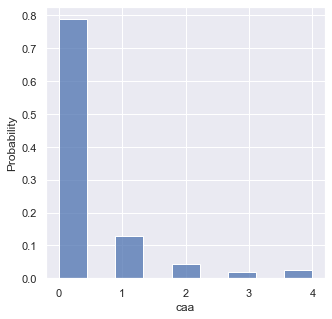

In [ ]:
sns.histplot(data=serangan_jantung, x="caa", stat="probability")

<AxesSubplot:>

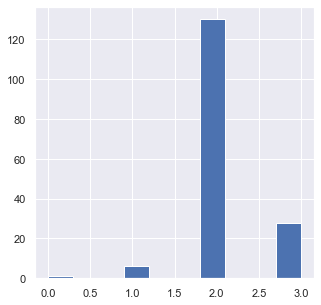

In [ ]:
serangan_jantung.thall.hist()

<AxesSubplot:xlabel='thall', ylabel='Probability'>

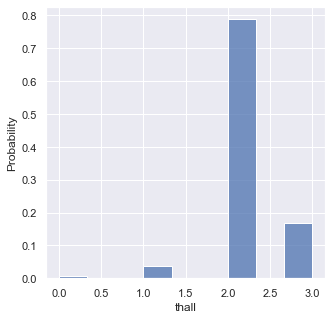

In [ ]:
sns.histplot(data=serangan_jantung, x="thall", stat="probability")

In [ ]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

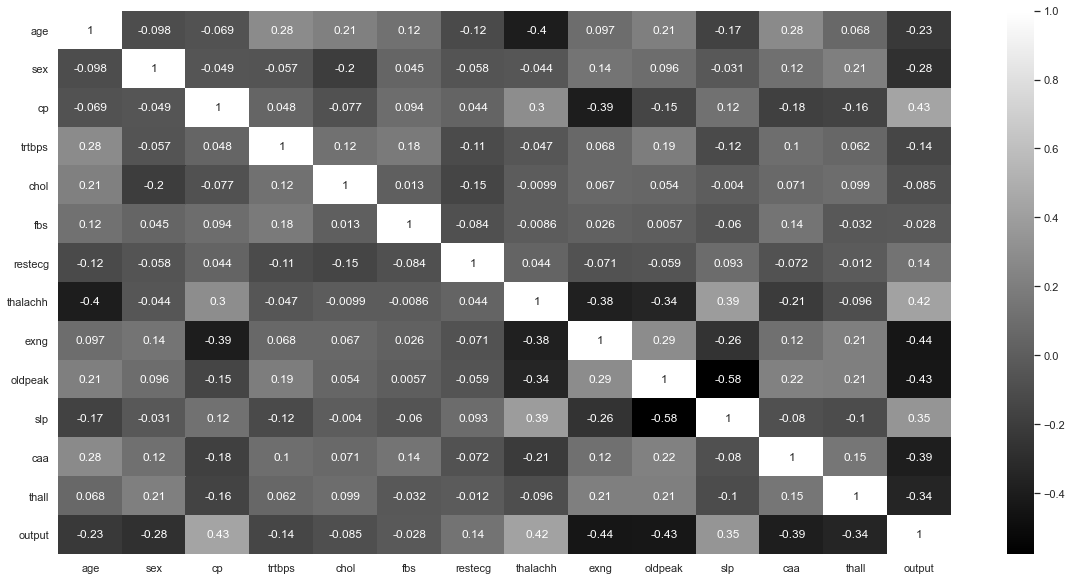

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.gray)